In [1]:
# import the libraries that will be used for this assignment
import numpy as np
import matplotlib.pyplot as plt

# Section 1

## Question 1

Consider the polynomial, 
$$ f(x) = \sum^N_{k=0} a_kx^k $$

When Horner's rule is generally evaluated, it is equivalent to the above polynomial. The zeroeth iteration returns $a_N$, the first iteration returns $ x*p_0+a_{N-1}=x*(a_N)+a_{N-1} $, the second iterations returns $ x*p_1+a_{N-2} = x*(x*a_N+a_{N-1})+a_{N-2} = a_Nx^2+a_{N-1}x+a_{N-2}$. The degree of the leading term is equal to the current iteration, and each subsequent term has a degree of one less than the previous term. On the $N^{th}$ iteration the degree of the leading power will be $N$ so that $ p_N=a_Nx^N+a_{N-1}x^{N-1}+...+a_2x^2+a_1x+a_0 = \sum^N_{k=0} a_kx^k$.

This algorithm is much more efficient at polynomial evaluation than the usual process of summing a linear combination of the powers of an input. With usual evaluation, an $ n^{th} $ degree polynomial takes at most $ n $ additions and $ n(n+1)/2 $ multiplications. With Horner's rule, an $ n^{th} $ degree polynomial takes at most $ n $ multiplications and additions. In other words, the maximum number of multiplications for the usual method is on the order of $ n^2 $, while the maximum number of multiplications for Horner's rule is on the order of $ n $, which is a much better computing cost for large $ n $.

## Question 2

To create a graph of $ f(x)=x^2-4 $ , we need an array of x-values and an array of y-values. The y-value array is defined with lambda notation to avoid defining a new function which is just slightly more cumbersome.

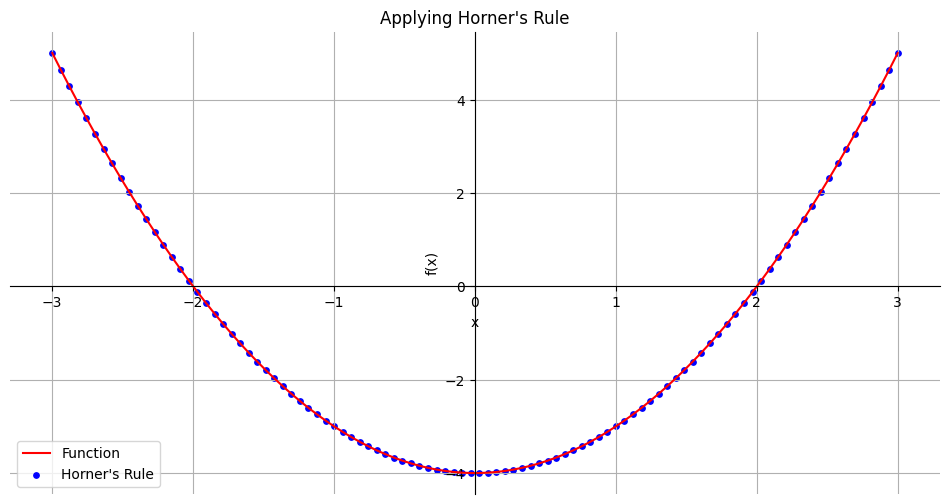

In [2]:
# define the x- and y-value arrays
x = np.linspace(-3,3,100)
y = lambda x: x**2 - 4


# define the Horner's rule algorithm 

def horners_rule(x, coefficients):
    N = len(coefficients)
    y_out = coefficients[-1] * np.ones( np.shape(x) )
    
    for k in np.flip( range(N-1) ):
        y_out = x * y_out + coefficients[k]
    
    return y_out

#set figure size
plt.figure(figsize=(12,6))

#set the axes to the origin
plt.gca().spines['left'].set_position('zero')
plt.gca().spines['top'].set_color('none')
plt.gca().spines['bottom'].set_position('zero')
plt.gca().spines['right'].set_color('none')

#plot the function f(x)=x^2-4
plt.plot(x, y(x), label='Function',c='red')

# plot Horner's rule for  a_0 = -4, a_1 = 0, and a_2 = 1.
plt.scatter(x,horners_rule(x,[-4,0,1]),c='blue', label="Horner's Rule", s=15)

# change graph title, axis labels, show legend, and show a grid
plt.title("Applying Horner's Rule")
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)


Horner's rule evaluates the given points basically on top of the function. There seems to be some rightward shift from the function value in the plot, though this may just be an issue with scatterplot. 


## Question 3

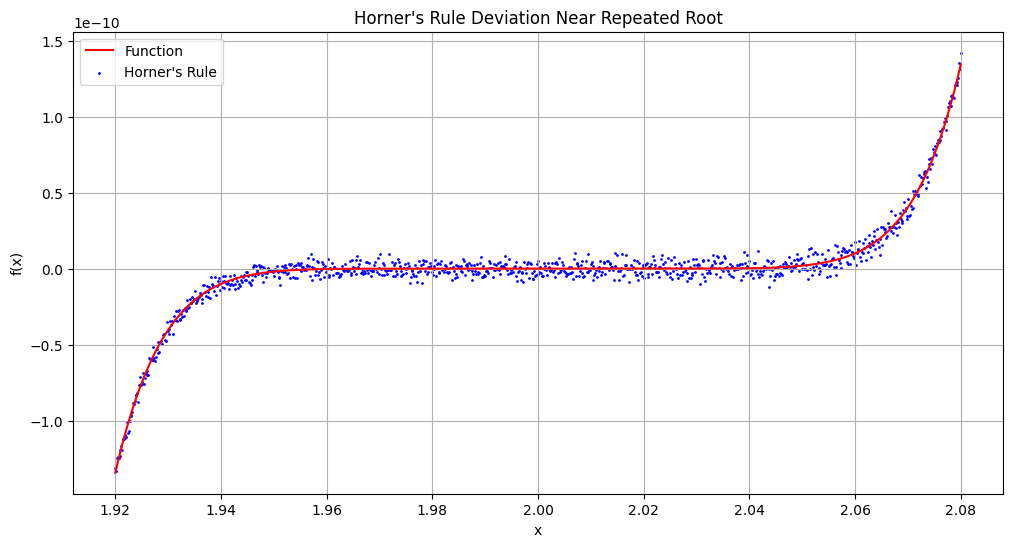

In [3]:
# define x- and y- value arrays to plot f(x) = (x-2)^9
x = np.linspace(1.92,2.08,1000)
y = lambda x: (x-2)**9

#set figure size
plt.figure(figsize=(12, 6))

# plot f(x) = (x-2)^9
plt.plot(x,y(x),label='Function',c='red')

# plot Horner's rule evaluation of f(x) = (x-2)^9
plt.scatter(x, horners_rule(x,[-512,2304,-4608,5376,-4032,2016,-672,144,-18,1]), label="Horner's Rule",c='blue', s=1)

# change graph title, axis labels, show legend, and show a grid
plt.title("Horner's Rule Deviation Near Repeated Root")
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)

When using Horner's rule for this function, the points seem almost randomly dispersed near the function value on this interval, which seems quite bad. The maximum error between the true value and the algorithmic evaluation is about $ 2*10^{-11} $ on $ x\in(1.94,2.06) $. As the function value drastically varies away from the nonuple root, Horner's rule seems to be more accurate. 

While Horner's rule may be computationally efficient, accuracy is not guarunteed.

# Section 2

## Question 1

In [4]:
# define My_Bisection which takes in a function, the boundaries a and b of an interval, and an acceptable tolerance for estimation
def My_Bisection(function, a, b, tol):

        # check that a and b are not both negative
        if (function(a) < 0 and function(b) < 0):
            return 'No root: Interval is negative'
            
        # check that a and b are not both positive
        elif (function(a) > 0 and function(b) > 0):
            return 'No root: Interval is positive'
        
        # check that b is greater than a for simplicity
        elif ( b < a ):
            return 'Change order of bounds'
            
        else:
            # initialize the midpoint and the number of iterates
            m = (a+b)/2
            iterates = 0

            # continue using the method while the length of the interval is greater than the tolerance
            while b-a > tol:

                # if f(m) is negative, set the lower boundary equal to m, update m, and update the number of iterates
                if function(m) < 0:
                    a=m
                    m = (a+b)/2
                    iterates+=1

                # if f(m) is positive, set the higher boundary equal to m, update m, and update the number of iterates
                elif 0 < function(m):
                    b=m
                    m = (a+b)/2
                    iterates+=1

                # if f(m) is exactly 0, the exact root is found
                else:
                    print('After %d iterates, the exact root is %f'%(iterates,m))
                    
                    # no further iterates are needed, break out of while loop
                    break

            # if the exact root was found, don't re-print the output
            if function(m)==0:
                pass

            # return the number of iterates, the bounds of the estimate interval, and the midpoint of the estimate interval
            else:
                print("After %d iterates, the estimated root is between %f and %f, or about %f" %(iterates, a, b, m))

In [5]:
# test My_Bisection
My_Function = lambda x: x**2 - 5
My_Bisection(My_Function, 0, 4, 0.0001)
print(5**(0.5))

After 16 iterates, the estimated root is between 2.236023 and 2.236084, or about 2.236053
2.23606797749979


In [6]:
# test My_Bisection
My_Function = lambda x: x**2 - 4
My_Bisection(My_Function, 0, 8, 0.0001)

After 1 iterates, the exact root is 2.000000


## Question 2

In each iteration of the bisection method the interval of estimation is cut in half, so that the actual root, $ x_s $ , is within the interval and our actual estimate, $ x_e $ , is taken to be the midpoint of the interval. Theoretically the maximum distance between $ x_s $ and $ x_e $ on the $ n^{th} $ iteration is half of the distance of the estimation interval. On the zeroeth iteration, $ x_e = \frac{a+b}{2} $ , so  $ |x_s-x_e| \leq \frac{|b-a|}{2} $. On the first iteration, $ |x_s-x_e| \leq \frac{|b-a|}{2^2} $. On the $ n^{th} $ iteration, $|x_s-x_e| =$ Raw Error$(n) \leq \frac{|b-a|}{2^{n+1}} = \frac{|b-a|}{2} \times 2^{-n}$ , so Raw Error$(n) \leq K \times 2^{-n} $ where $K = \frac{|b-a|}{2} $ is a constant. By definition, Raw Error$(n)$ is $O(2^{-n})$.

## Question 3

In [7]:
# define g(x) = (x-2)^9 with a lambda expression
My_G = lambda x: (x-2)**9

# estiamte the root of g(x) with bisection method between a = 1.92 and b = 2.07 with a tolerance of 0.001
My_Bisection(My_G, 1.92, 2.07, 0.001)

After 8 iterates, the estimated root is between 1.999687 and 2.000273, or about 1.999980


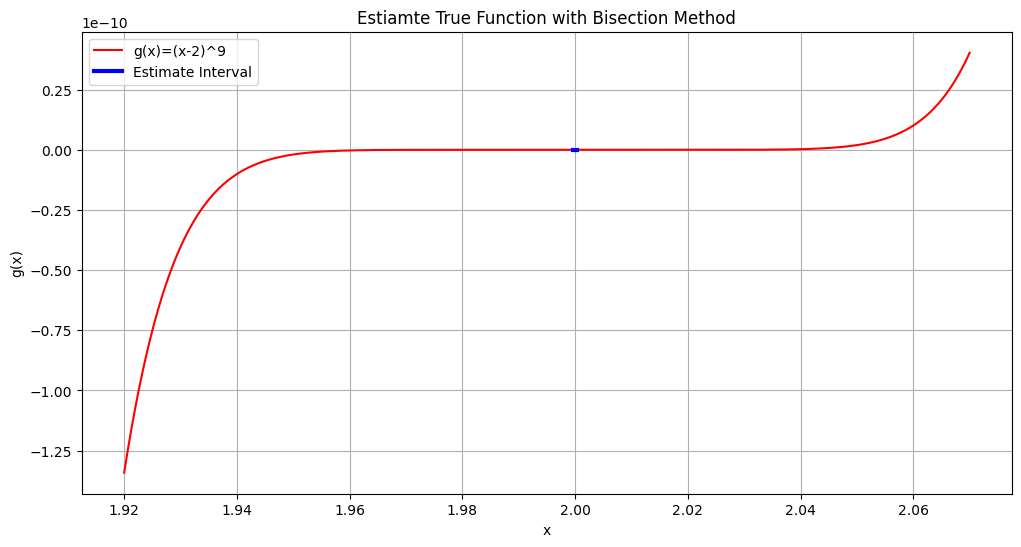

In [8]:
# define x- and y-value arrays to plot g(x)
x = np.linspace(1.92,2.07,1000)
y = My_G

# set the figure size
plt.figure(figsize=(12, 6))

# plot g(x)
plt.plot(x,y(x),label="g(x)=(x-2)^9",c='red')

# define x- and y- value arrays to plot the estimation interval
x_interval = (1.999687, 2.000273)
y_interval = (0,0)

# plot the estimation interval with a blue color and more width than g(x)
plt.plot(x_interval,y_interval,label='Estimate Interval',c='blue',linewidth=3)

# change graph title, axis labels, show legend, and show a grid
plt.title("Estiamte True Function with Bisection Method")
plt.xlabel('x')
plt.ylabel('g(x)')
plt.legend()
plt.grid(True)

For the eighth iteration, the error should theoretically be within $ \frac{|b-a|}{2} \times 2^{-n} = \frac{|2.07-1.92|}{2} \times 2^{-8} = 0.00030 $ . The actual error is $ |2-1.999980|=0.000020 $, so my error is within the theoretical bound.

In [9]:
# define g(x) = (x-2)^9 with Horner's method
Bi_With_Horner = lambda x: horners_rule(x,[-512,2304,-4608,5376,-4032,2016,-672,144,-18,1])

# estiamte the root of g(x) from Horner's method with the boundaries a = 1.92, b = 2.07, and tolerance of 0.001
My_Bisection(Bi_With_Horner, 1.92, 2.07, 0.001)

After 8 iterates, the estimated root is between 2.013164 and 2.013750, or about 2.013457


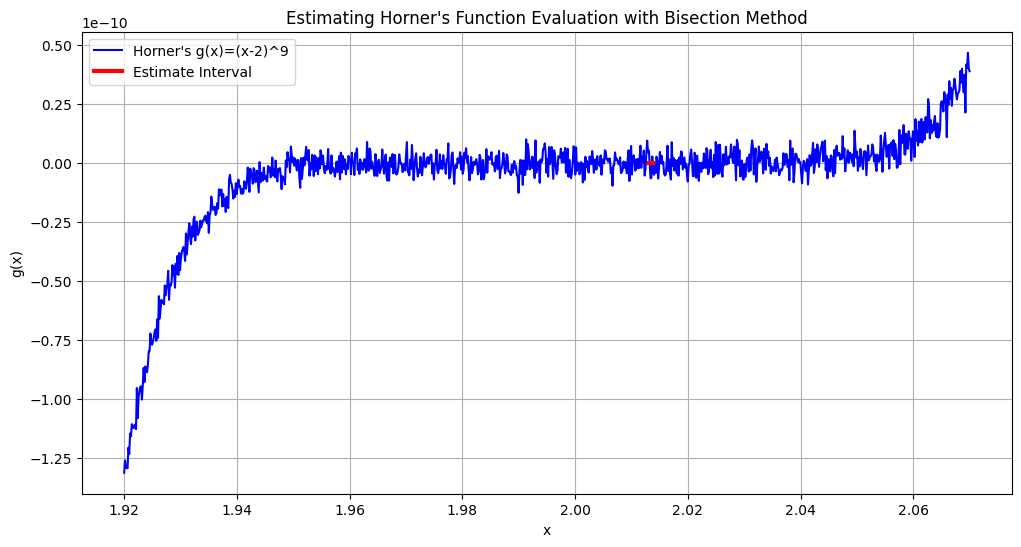

In [10]:
# define x- and y-value arrays to plot g(x) from Horner's method
x = np.linspace(1.92,2.07,1000)
y = Bi_With_Horner

# set the figure size
plt.figure(figsize=(12, 6))

# plot g(x) with Horner's method and with blue color
plt.plot(x,y(x),label="Horner's g(x)=(x-2)^9", c='blue')

# define x- and y-value arrays for the estimation interval for bisection with Horner's method
x_interval = (2.013164, 2.013750)
y_interval = (0,0)

# plot the estimation interval for bisection with Horner's method and with red color
plt.plot(x_interval,y_interval,label='Estimate Interval',c='red',linewidth=3)

# change graph title, axis labels, show legend, and show a grid
plt.title("Estimating Horner's Function Evaluation with Bisection Method")
plt.xlabel('x')
plt.ylabel('g(x)')
plt.legend()
plt.grid(True)

Horner's rule evaluates function values with sporatic error around a root when the root has high multiplicity as seen in the graph. The estiamtion interval completely misses the true root of the polynomial and collapses around a different errored root formed from Horner's method. The error is not within the theoretical bound.

# Section 3

## Question 1

In [11]:
# define Newton's method which takes as inputs a function, it's derivative, an estimation tolerance, and an initial root guess
def my_newton(f_x, f_x_prime, tol, x_0):
    
    # initialize the while check and iteration counter
    check = np.inf
    MAX_ITER=0
    
    # start the while loop
    while check > tol:
        
        # definition of Newton's Method 
        x_new = x_0 - ( f_x(x_0) )/( f_x_prime(x_0) )
        
        # iterate the counter
        MAX_ITER+=1
        
        # define check as the difference between consecutive estimates
        check = abs(x_new-x_0)
        
        # update estimate after check
        x_0 = x_new
        
        # break out of while loop if number of iterations exceeds 100
        if MAX_ITER == 100:
            break
            
    # return that a root within tolerance was not found        
    if MAX_ITER == 100:
        print('Number of iterations exceded, last estimated root was %f (Not within tolerance).'%(x_new))

    # return the estiamted root
    else:
        print('Estimated root is %f (Within tolerance).'%(x_new))


## Question 2

In [12]:
# define h(x) = e^x - 4 with lambda expression
H_x = lambda x: np.exp(x) - 4

# define h'(x) = e^x with lambda expression
H_x_Prime = lambda x: np.exp(x)

# apply Newton's method to h(x) with a tolerance of 10^-10 and initial guess of 10
my_newton(H_x,H_x_Prime, 10**(-10), 10)

Estimated root is 1.386294 (Within tolerance).


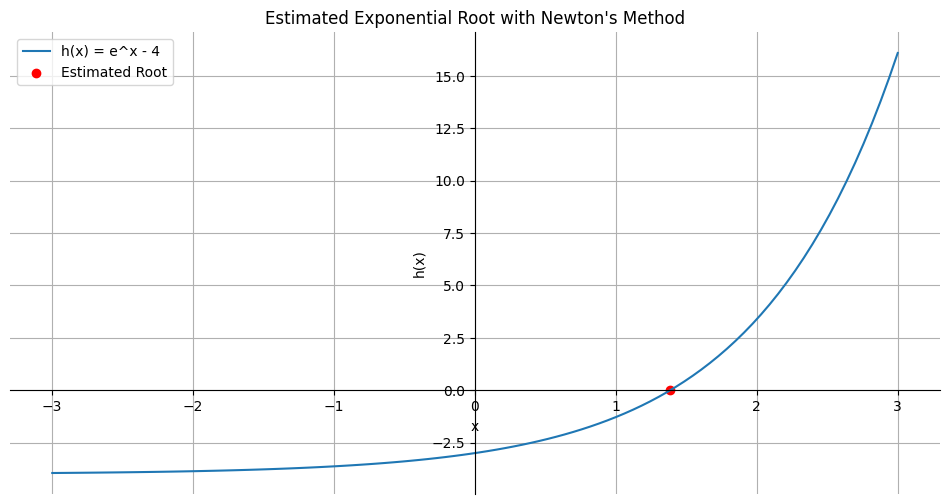

In [13]:
# define x- and y-value arrays to plot h(x) = e^x - 4
x = np.linspace(-3,3,100)
y = H_x

# set the figure size
plt.figure(figsize=(12, 6))

# plot h(x) = e^x - 4
plt.plot(x,y(x),label ="h(x) = e^x - 4")

# define x- and y-value array for estimated root
x = [1.386294]
y = H_x

# plot estimated root
plt.scatter(x,y(x),label="Estimated Root",c="red")

# change graph title, axis labels, show legend, and show a grid
plt.title("Estimated Exponential Root with Newton's Method")
plt.xlabel('x')
plt.ylabel('h(x)')
plt.legend()
plt.grid(True)

#set the axes to the origin
plt.gca().spines['left'].set_position('zero')
plt.gca().spines['top'].set_color('none')
plt.gca().spines['bottom'].set_position('zero')
plt.gca().spines['right'].set_color('none')


## Question 3

In [21]:
# intitalize raw error array in global scope
Raw_Error_Newton = []

# redefine my_newton with to keep track of raw error
def my_newton(f_x, f_x_prime, tol, x_0):
    
    # initialize while check and iteration counter 
    check = np.inf
    iterate=0

    # continue while loop while check is greater than tolerance
    while check > tol:
        
        # definition of Newton's Method 
        x_new = x_0 - ( f_x(x_0) )/( f_x_prime(x_0) )
        
        # iterate the counter
        iterate+=1
        
        # update the check as the difference between current and previous estimate = raw error
        check = abs(x_new-x_0)
        
        # append current raw error to error array
        Raw_Error_Newton.append(check)
        
        # update estimate after check
        x_0 = x_new

        # break if iterations exceeds 100
        if iterate == 100:
            break
    if iterate == 100:
        print('Number of iterations exceded, last estimated root was %f'%(x_new))
    else:
        print('Estimated root is %f.'%(x_new))


my_newton(H_x,H_x_Prime, 10**(-10), 10)

Estimated root is 1.386294.


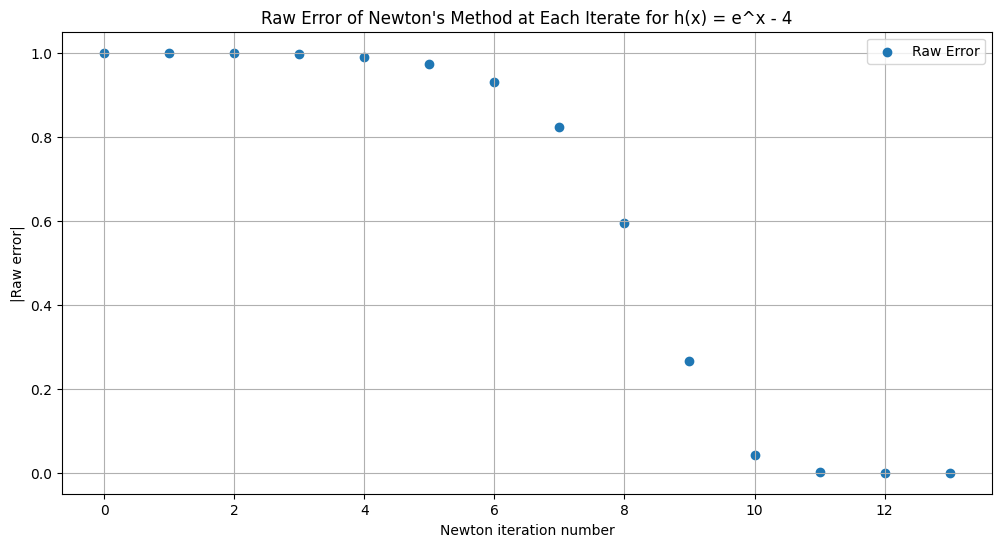

In [22]:
# Raw_Error_Newton is the array of y-values, define an x_value array as the iteration number of each raw error
iterates = range(np.shape(Raw_Error_Newton)[0])

# define the figure size
plt.figure(figsize=(12, 6))

# plot the raw error at each iterare
plt.scatter(iterates,Raw_Error_Newton, label="Raw Error")

# change graph title, axis labels, show legend, and show a grid
plt.title("Raw Error of Newton's Method at Each Iterate for h(x) = e^x - 4")
plt.xlabel('Newton iteration number')
plt.ylabel('|Raw error|')
plt.legend()
plt.grid(True)

# Section 4

## Question 1

In [16]:
# define my secant taking inputs of a function, two initial guesses, and an estimate error tolerance
def my_secant(f_x, x_0, x_1, tol):
    
    # initialize the while check and iteration counter
    check = np.inf
    iterate = 0

    # continue to loop while check is greater than tolerance
    while check > tol:
        
        # definition of secant method
        x_new = x_1 - f_x(x_1) * (x_0-x_1) / ( f_x(x_0) - f_x(x_1) )
        
        # update iterate
        iterate+=1
        
        # update check
        check = abs(x_new-x_1)
        
        # update both estimates
        x_0 = x_1
        x_1 = x_new

        # break out of while loop if number of iterates is too large
        if iterate == 100:
            break

    # return special message if number of iterates is too large
    if iterate == 100:
        print('Number of iterations exceded, last estimated root was %f (Not within tolerance).'%(x_new))

    # return last estimate which is within tolerance
    print('Estimated root is %f (Within tolerance.'%(x_new))
        

## Question 2

Estimated root is 1.386294 (Within tolerance.


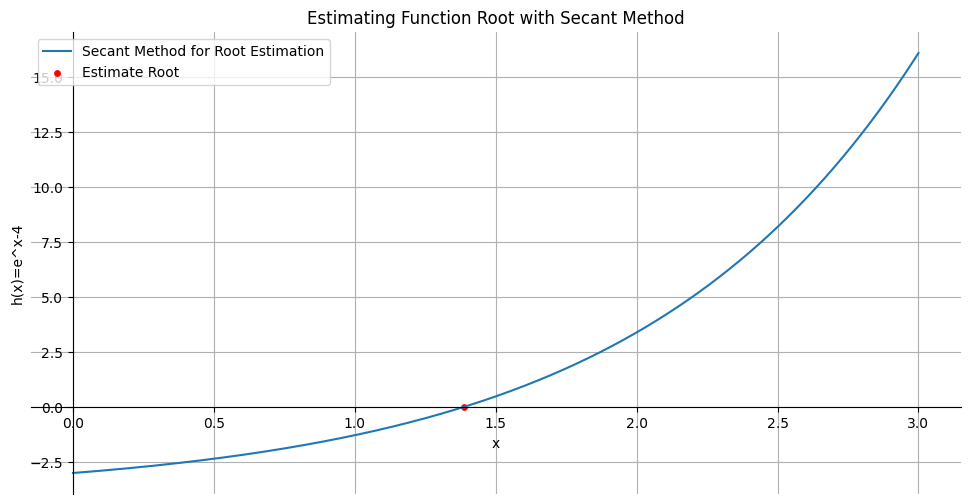

In [17]:
# define h(x) = e^x - 4 with lambda expression
H_x = lambda x: np.exp(x)-4

# apply Secant method to estimate root of h(x) with tolerance of 10^-10
my_secant(H_x, 10, 20, 10**(-10))
# estimated root is returned as 1.386294

# define figure size
plt.figure(figsize=(12, 6))

# define x-value array to plot h(x)
x = np.linspace(0,3,1000)

# plot h(x)
plt.plot(x,H_x(x),label='Secant Method for Root Estimation')

# plot estimated root
plt.scatter((1.386294),(0),c='red',s=15,label='Estimate Root')

# change graph title, axis labels, show legend, and show a grid
plt.title("Estimating Function Root with Secant Method")
plt.ylabel('h(x)=e^x-4')
plt.xlabel('x')
plt.legend()
plt.grid(True)

# change position of axes to origin
plt.gca().spines['left'].set_position('zero')
plt.gca().spines['top'].set_color('none')
plt.gca().spines['bottom'].set_position('zero')
plt.gca().spines['right'].set_color('none')


## Question 3

Estimated root is 1.386294 (Within tolerance).


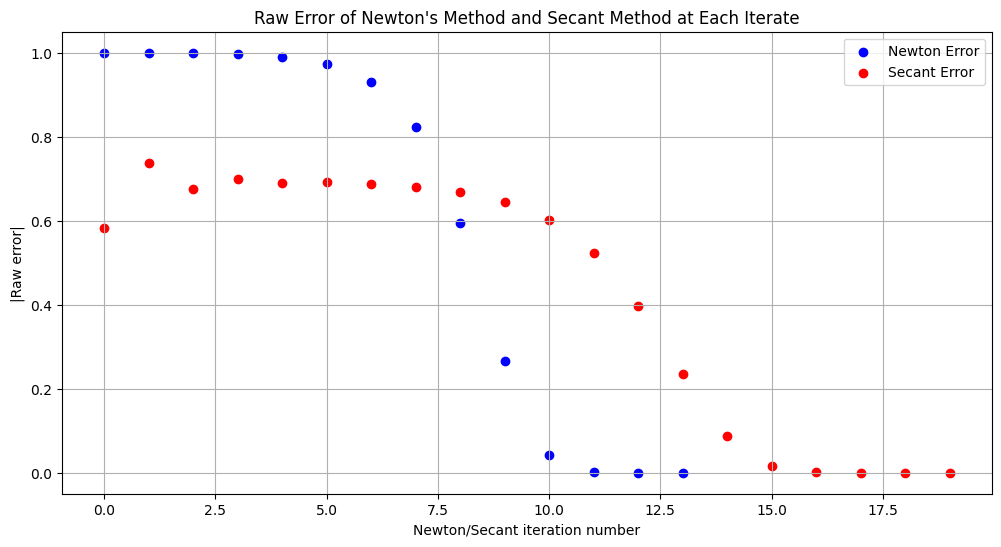

In [23]:
# initialize secant error
Raw_Error_Secant = []

# redefine Secant method to update the error array
def my_secant(f_x, x_0, x_1, tol):

    # initialize while check and iterate counter
    check = np.inf
    iterate = 0

    # stay in loop while check is greater than tolerance
    while check > tol:
        
        # definition of secant method
        x_new = x_1 - f_x(x_1) * (x_0-x_1) / ( f_x(x_0) - f_x(x_1) )
        
        # update iterate
        iterate+=1
        
        # update check with difference between current and previous estimate
        check = abs(x_new-x_1)
        
        # append difference between current and previous estimate to raw error array
        Raw_Error_Secant.append(check)
        
        # update estimates
        x_0 = x_1
        x_1 = x_new

        # if number of iterates is too big, break out of while loop
        if iterate == 100:
            break

    # if number of iterates is too big, return special message
    if iterate == 100:
        print('Number of iterations exceded, last estimated root was %f (Out of tolerance).'%(x_new))

    # otherwise, return estimated root
    print('Estimated root is %f (Within tolerance).'%(x_new))

# apply Secant method to h(x) = e^x - 4
my_secant(H_x, 11, 10, 10**(-10))

# define figure size
plt.figure(figsize=(12, 6))

# define x-value arrays for Newton's method and Secant method based on the iterate of each raw error
iterates_Newton = range(np.shape(Raw_Error_Newton)[0])
iterates_Secant = range(np.shape(Raw_Error_Secant)[0])

# plot raw error of Newton method and Secant method versus iterate number
plt.scatter(iterates_Newton, Raw_Error_Newton,c='blue',label="Newton Error")
plt.scatter(iterates_Secant, Raw_Error_Secant,c='red',label="Secant Error")

# change graph title, axis labels, show legend, and show a grid
plt.title("Raw Error of Newton's Method and Secant Method at Each Iterate")
plt.xlabel('Newton/Secant iteration number')
plt.ylabel('|Raw error|')
plt.legend()
plt.grid(True)

Newton's method has relatively higher raw error in early iterations compared to Secant method, which means that it is converging faster towards the root for this particular function. Newton's method also contains much fewer iterations than Secant method, which supports the notion that Newton's method converges faster than Secant method for this function as the initial guesses were similar.

# Section 5

## Question 1

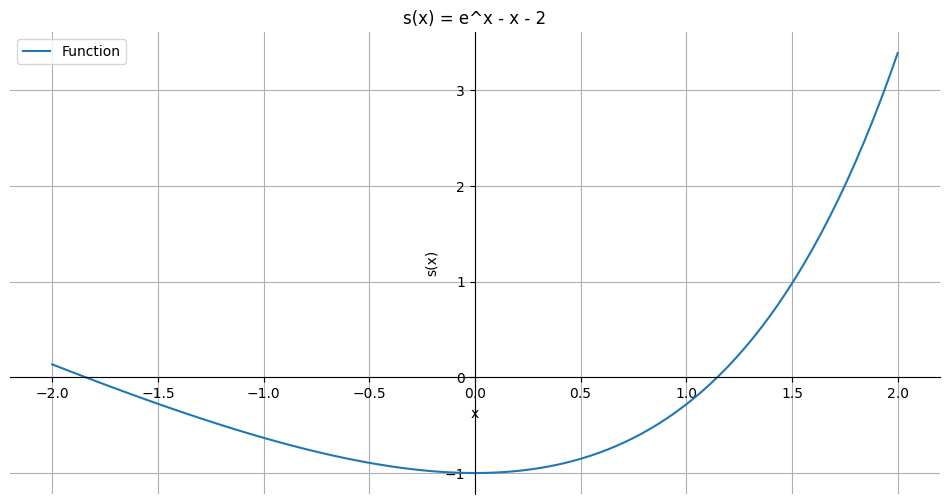

In [19]:
# define x- and y-value arrays to plot s(x) = e^x - x -2 with a lambda expression
x = np.linspace(-2,2,100)
S = lambda x: np.exp(x) - x - 2

#define figure size
plt.figure(figsize=(12,6))

# plot s(x) versus x
plt.plot(x,S(x),label='Function')

# change graph title, axis labels, show legend, and show a grid
plt.title("s(x) = e^x - x - 2")
plt.xlabel("x")
plt.ylabel("s(x)")
plt.legend()
plt.grid(True)

# change position of axes to origin
plt.gca().spines['left'].set_position('zero')
plt.gca().spines['top'].set_color('none')
plt.gca().spines['bottom'].set_position('zero')
plt.gca().spines['right'].set_color('none')


## Question 2

Taylor's Remainder theorem states that $ f(x) = f(a) + f'(a)(x-a) + \frac{f''(\eta)}{2}(x-a)^2 $ for some $\eta$ between $x$ and $a$ that likely depends on $x$. Let $f(x)=s(x)=e^x-x-2$ , let $x=\xi^+$ , and choose $a=x_k$ . Then $ s(\xi^+) = 0 = s(x_k)+s'(x_k)(\xi^+-x_k)+\frac{s''(\eta)}{2}(\xi^+-x_k)^2$ , 

$ 0 = \frac{s(x_k)}{s'(x_k)}+\xi^+-x_k+\frac{1}{2}\frac{s''(\eta)}{s'(x_k)}(\xi^+-x_k)^2 $ ,

$ \xi^+ = x_k - \frac{s(x_k)}{s'(x_k)} - \frac{1}{2}\frac{s''(\eta)}{s'(x_k)}(\xi^+-x_k)^2$ , 

$ \xi^+-x_{k+1} = - \frac{1}{2}\frac{s''(\eta)}{s'(x_k)}(\xi^+-x_k)^2$ .

Notice the RHS is always negative as $s''(\eta) = e^{\eta}$ is positive, $s'(x_k) = e^{x_k}-1 $ is positive for $x_k \gt 0$ , and $(\xi^+-x_k)^2$ is always positive for $x_k \ne \xi^+ $ . 

This means that $\xi^+-x_{k+1}$ is always negative, so $x_{k+1} \gt \xi^+$ for $k$ in general.



## Question 3

$ x_{0,-} $ will require fewer iterations for the error to be within tolerance because the slope to the left of the roots is much shallower and more linear than that to the right of the roots. This means that subsquent estimates on the left will be much further apart than those on the right. 

In [20]:
# reinitialize raw error
Raw_Error_Newton = []

# apply Newton's method to s(x) = e^x - x - 2 with initial guess of -100
my_newton(lambda x: np.exp(x)-x-2, lambda x: np.exp(x)-1, 10**(-10), -100)
print(np.shape(Raw_Error_Newton)[0])

# reinitialize raw error
Raw_Error_Newton = []

# apply Newton's method to s(x) = e^x - x - 2 with initial guess of =100
my_newton(lambda x: np.exp(x)-x-2, lambda x: np.exp(x)-1, 10**(-10), 100)
print(np.shape(Raw_Error_Newton)[0])

# reinitialize raw error
Raw_Error_Newton = []

Estimated root is -1.841406.
5
Number of iterations exceded, last estimated root was 1.302295
100


The negative root was within tolerance after 5 iterations while the positive root never got within tolerance as the iteration number was capped. The negative initial guess was much faster as expected.